In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks
from matplotlib.pyplot import yticks

In [2]:
df = pd.DataFrame(pd.read_csv("Data/Salary_Data.csv"))
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [3]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [5]:
df = df.dropna()
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [37]:
# Dimension Reduction

In [6]:
df = df[['Age' , 'Gender' , 'Education Level' , 'Years of Experience' , 'Salary']]
df

,Age,Gender,Education Level,Years of Experience,Salary
0,32.0,Male,Bachelor's,5.0,90000.0
1,28.0,Female,Master's,3.0,65000.0
2,45.0,Male,PhD,15.0,150000.0
3,36.0,Female,Bachelor's,7.0,60000.0
4,52.0,Male,Master's,20.0,200000.0
...,...,...,...,...,...
370,35.0,Female,Bachelor's,8.0,85000.0
371,43.0,Male,Master's,19.0,170000.0
372,29.0,Female,Bachelor's,2.0,40000.0
373,34.0,Male,Bachelor's,7.0,90000.0


In [7]:
gender = pd.get_dummies(df['Gender'] , drop_first = True)
gender

,Male
0,1
1,0
2,1
3,0
4,1
...,...
370,0
371,1
372,0
373,1


In [8]:
df = pd.concat([df, gender], axis = 1)
df

,Age,Gender,Education Level,Years of Experience,Salary,Male
0,32.0,Male,Bachelor's,5.0,90000.0,1
1,28.0,Female,Master's,3.0,65000.0,0
2,45.0,Male,PhD,15.0,150000.0,1
3,36.0,Female,Bachelor's,7.0,60000.0,0
4,52.0,Male,Master's,20.0,200000.0,1
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,8.0,85000.0,0
371,43.0,Male,Master's,19.0,170000.0,1
372,29.0,Female,Bachelor's,2.0,40000.0,0
373,34.0,Male,Bachelor's,7.0,90000.0,1


In [9]:
education = pd.get_dummies(df['Education Level'] , drop_first = True)
education

,Master's,PhD
0,0,0
1,1,0
2,0,1
3,0,0
4,1,0
...,...,...
370,0,0
371,1,0
372,0,0
373,0,0


In [10]:
df = pd.concat([df , education] , axis = 1)
df

,Age,Gender,Education Level,Years of Experience,Salary,Male,Master's,PhD
0,32.0,Male,Bachelor's,5.0,90000.0,1,0,0
1,28.0,Female,Master's,3.0,65000.0,0,1,0
2,45.0,Male,PhD,15.0,150000.0,1,0,1
3,36.0,Female,Bachelor's,7.0,60000.0,0,0,0
4,52.0,Male,Master's,20.0,200000.0,1,1,0
...,...,...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,8.0,85000.0,0,0,0
371,43.0,Male,Master's,19.0,170000.0,1,1,0
372,29.0,Female,Bachelor's,2.0,40000.0,0,0,0
373,34.0,Male,Bachelor's,7.0,90000.0,1,0,0


In [11]:
df.drop(['Gender' , 'Education Level'] , axis = 1 , inplace = True)
df

,Age,Years of Experience,Salary,Male,Master's,PhD
0,32.0,5.0,90000.0,1,0,0
1,28.0,3.0,65000.0,0,1,0
2,45.0,15.0,150000.0,1,0,1
3,36.0,7.0,60000.0,0,0,0
4,52.0,20.0,200000.0,1,1,0
...,...,...,...,...,...,...
370,35.0,8.0,85000.0,0,0,0
371,43.0,19.0,170000.0,1,1,0
372,29.0,2.0,40000.0,0,0,0
373,34.0,7.0,90000.0,1,0,0


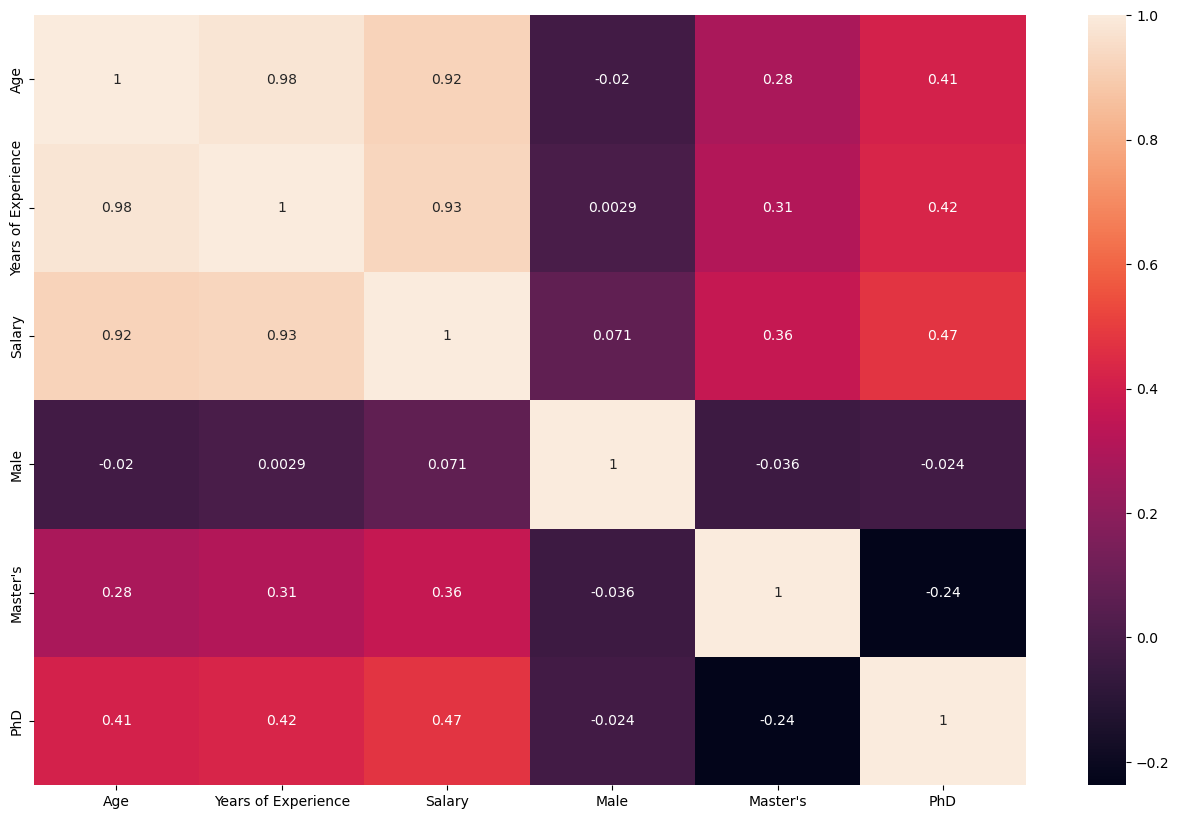

In [12]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True,)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 1)

In [14]:
# Importing LinearRegression
from sklearn.linear_model import LinearRegression

In [15]:
df_data = df
X_train = df_data
Y_train = df_data.pop('Salary')

ln = LinearRegression()
model = ln.fit(X_train, Y_train)


In [16]:
data = df_test.iloc[11:12]
actual_salary = data.pop('Salary')

print(data)
predicted_salary = model.predict(data)
print("Actual Expenses" , actual_salary)
print("Predicted Expenses" , predicted_salary)

      Age  Years of Experience  Male  Master's  PhD
171  29.0                  2.0     1         0    0
Actual Expenses 171    40000.0
Name: Salary, dtype: float64
Predicted Expenses [49122.14178489]


In [17]:
# From User Input

import pandas as pd

age = float(input("Enter age = "))
exp = float(input("Enter exp = "))
gender = int(input("Enter 1 for male and 0 for female = "))
master = int(input("Enter 1 if your highest degree is masters if not then zero = "))
phd = int(input("Enter 1 if your highest degree is phd if not then zero = "))

predictdf = pd.DataFrame({'Age' : [age] , 'Years of Experience' : [exp] , 'Male' : [gender] , "Master's" : [master] , 'PhD' : [phd]})

predicted_expenses = model.predict(predictdf)
print("The predicted expenses = " , predicted_expenses)

Enter age = 60
Enter exp = 35
Enter 1 for male and 0 for female = 1
Enter 1 if your highest degree is masters if not then zero = 1
Enter 1 if your highest degree is phd if not then zero = 0
The predicted expenses =  [251640.97440475]


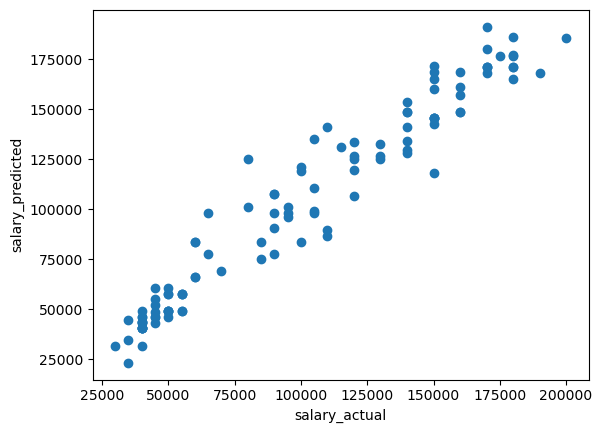

In [18]:
salary_actual = df_test.pop('Salary')
salary_predicted = model.predict(df_test)
plt.scatter(salary_actual,salary_predicted)
plt.xlabel('salary_actual')
plt.ylabel('salary_predicted')
plt.show()